In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_excel(r"C:\Users\rosha\Desktop\assignments\Random Forest\glass.xlsx",sheet_name="glass")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
data.Fe.value_counts()

Fe
0.00    144
0.24      7
0.17      7
0.09      6
0.10      5
0.11      4
0.16      3
0.28      3
0.12      3
0.22      3
0.14      3
0.07      3
0.19      2
0.15      2
0.08      2
0.06      1
0.21      1
0.05      1
0.51      1
0.37      1
0.35      1
0.25      1
0.18      1
0.34      1
0.29      1
0.30      1
0.20      1
0.32      1
0.26      1
0.03      1
0.31      1
0.01      1
Name: count, dtype: int64

In [6]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# There are no null values present in the dataset so we won't use any imputation methods for this dataset

In [7]:
data[data.duplicated(keep=False)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


# There is one duplicated value which is 39 sample the copy of 38 sample 

#  we removed the duplicate value in the dataset 

In [8]:
data.drop(39,axis=0,inplace=True)

In [9]:
data[data.duplicated(keep=False)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


# After the removing the duplicate the index is not formated by the complier so we use reset_index to change the index to continous 

In [10]:
data.reset_index(drop=True,inplace=True)

In [11]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
data.mode()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51590,13.00,0.0,1.54,72.86,0.0,8.03,0.0,0.0,2.0
1,1.51645,13.02,NaN,NaN,72.99,NaN,8.43,NaN,NaN,NaN
2,1.52152,13.21,NaN,NaN,73.10,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,73.11,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,73.28,NaN,NaN,NaN,NaN,NaN


#  In this dataset all are numerical columsn so we can apply the histogram plot for all the columns we can see the disturbtion of the columns below

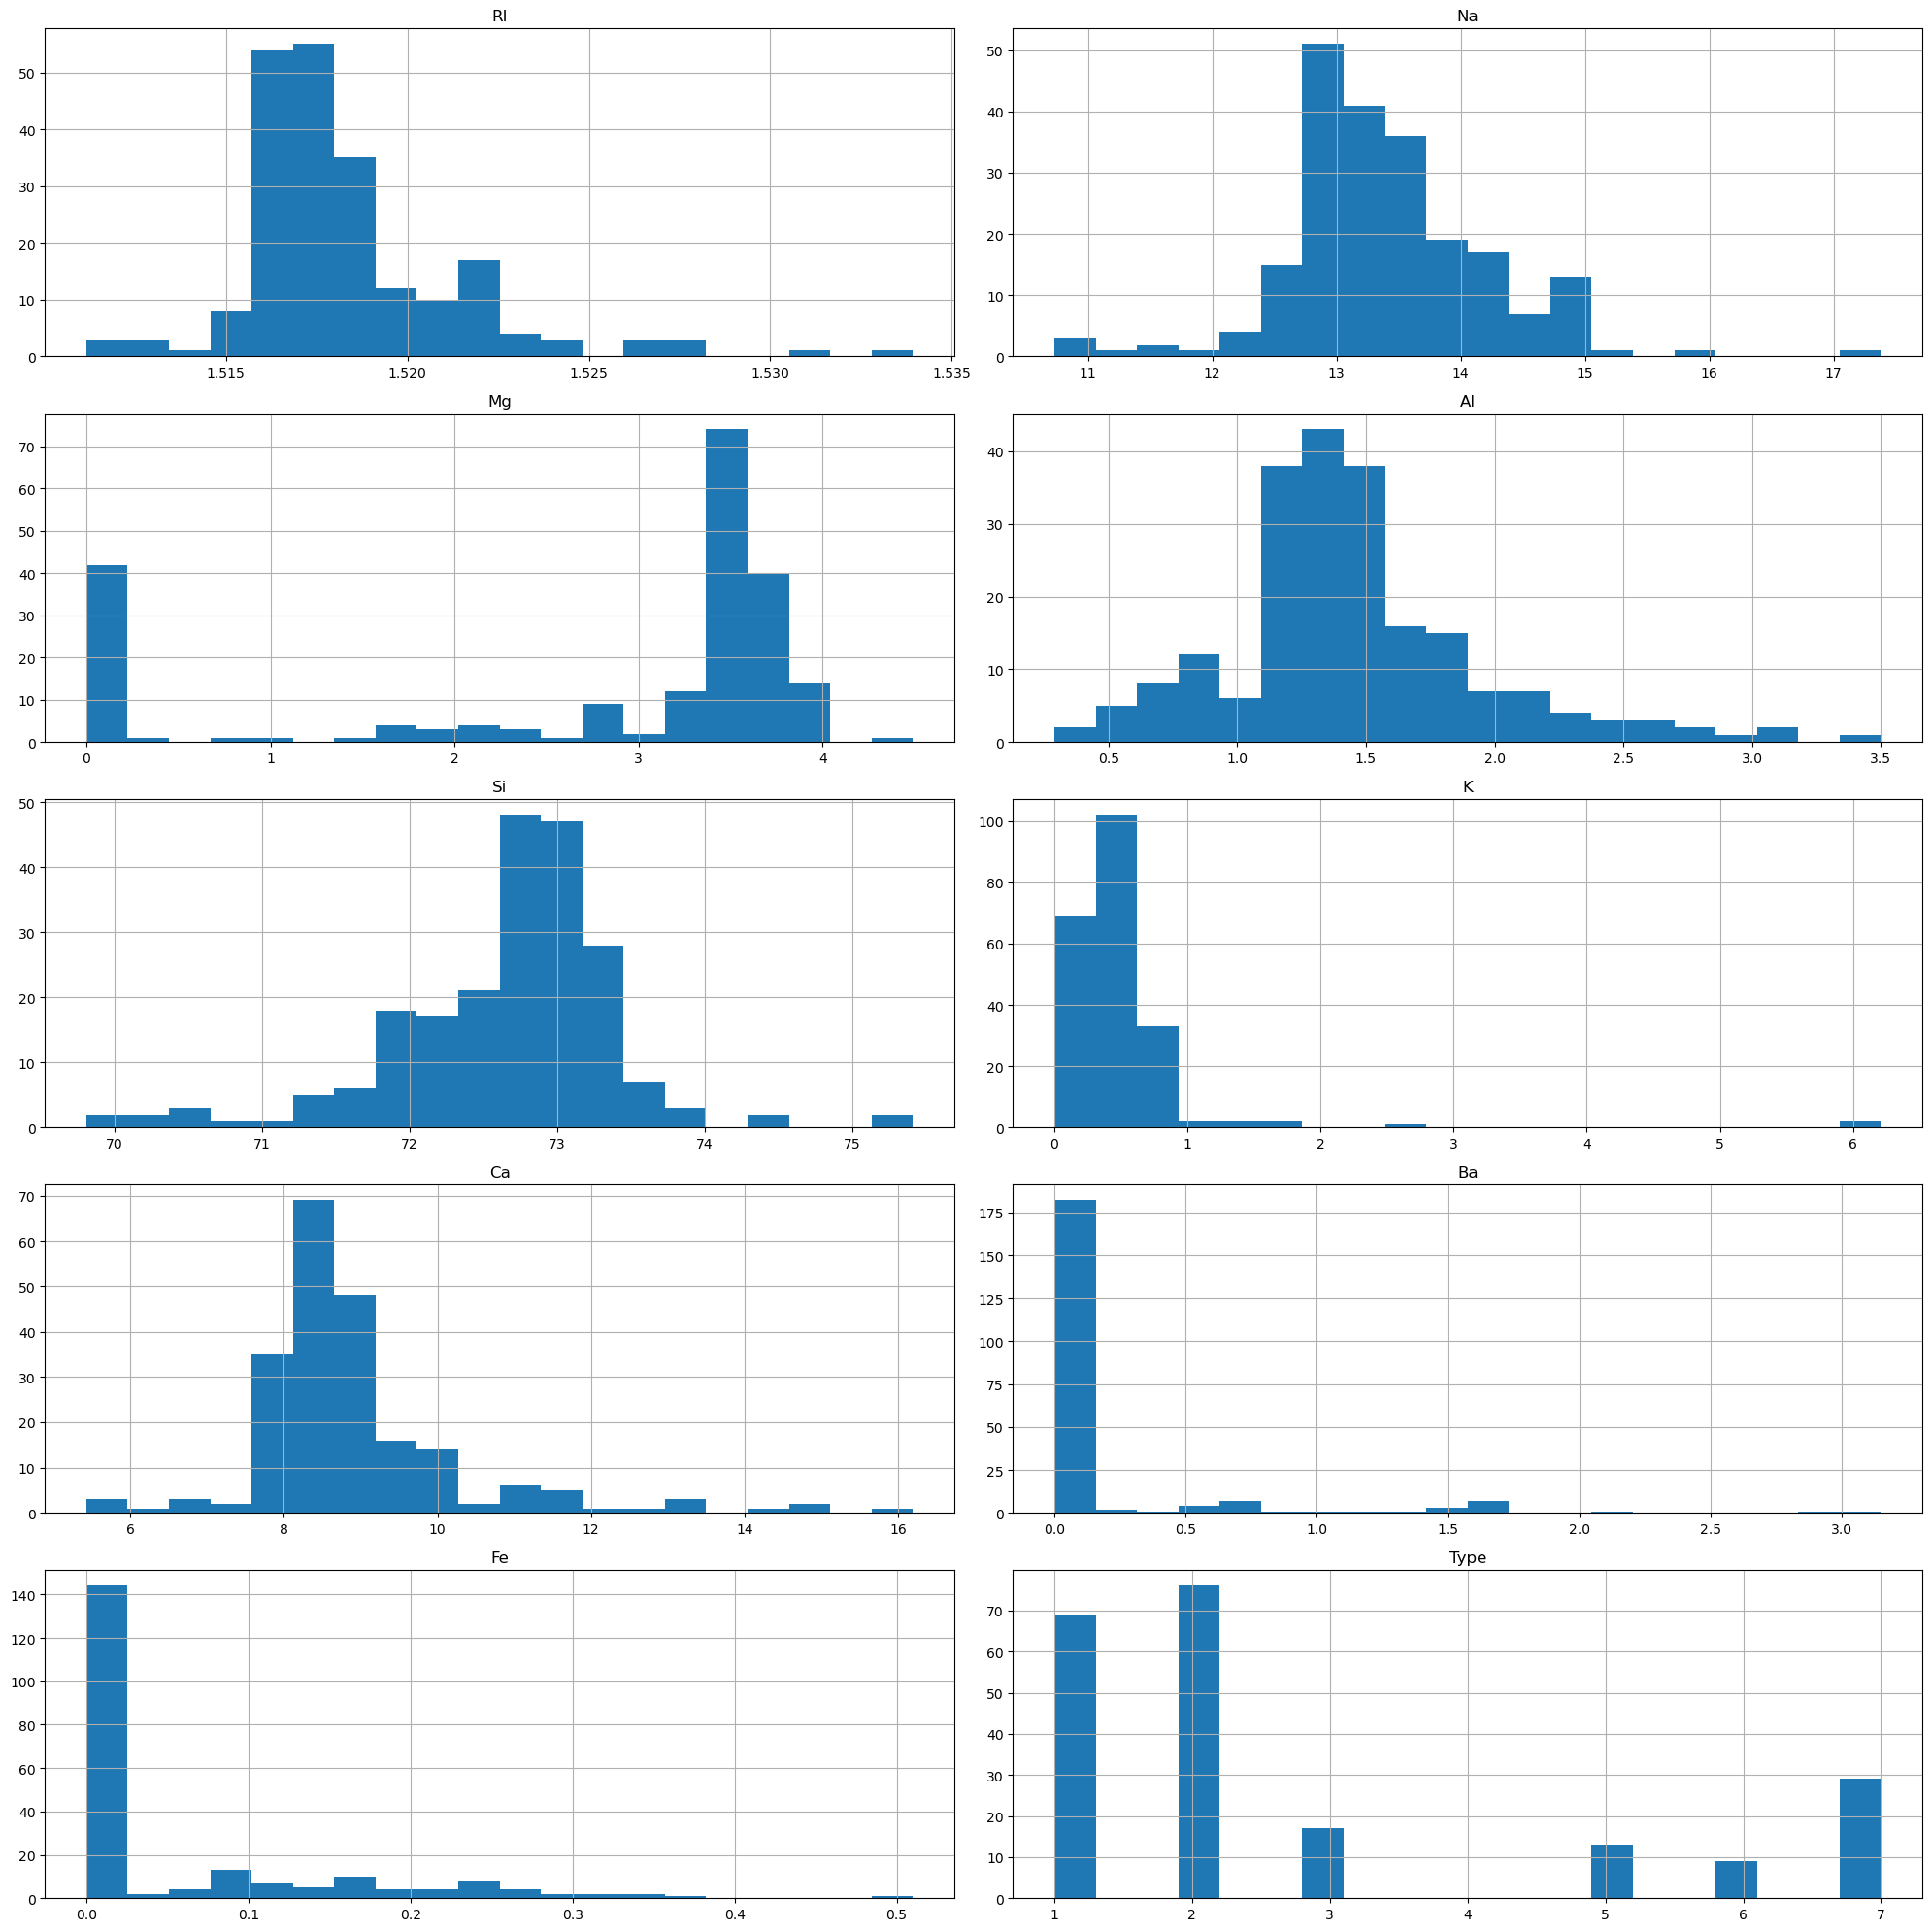

In [13]:
data.hist(bins=20,figsize=(20,20),layout=(5,2))
plt.tight_layout()
plt.show()

In [14]:
data.skew()

RI      1.648017
Na      0.465699
Mg     -1.146096
Al      0.938402
Si     -0.744646
K       6.545429
Ca      2.050752
Ba      3.406749
Fe      1.747173
Type    1.108861
dtype: float64

In [15]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

data["K"] = pt.fit_transform(data[["K"]])
data["Ca"] = pt.fit_transform(data[["Ca"]])
data["Ba"] = pt.fit_transform(data[["Ba"]])
data["Fe"] = pt.fit_transform(data[["Fe"]])
data["RI"] = pt.fit_transform(data[["RI"]])
data["Mg"] = pt.fit_transform(data[["Mg"]])

# Actually we don't remove the outliers in the random forest model because the model is  not linear type  model  it use threshold to  calculate so we keep it as it  

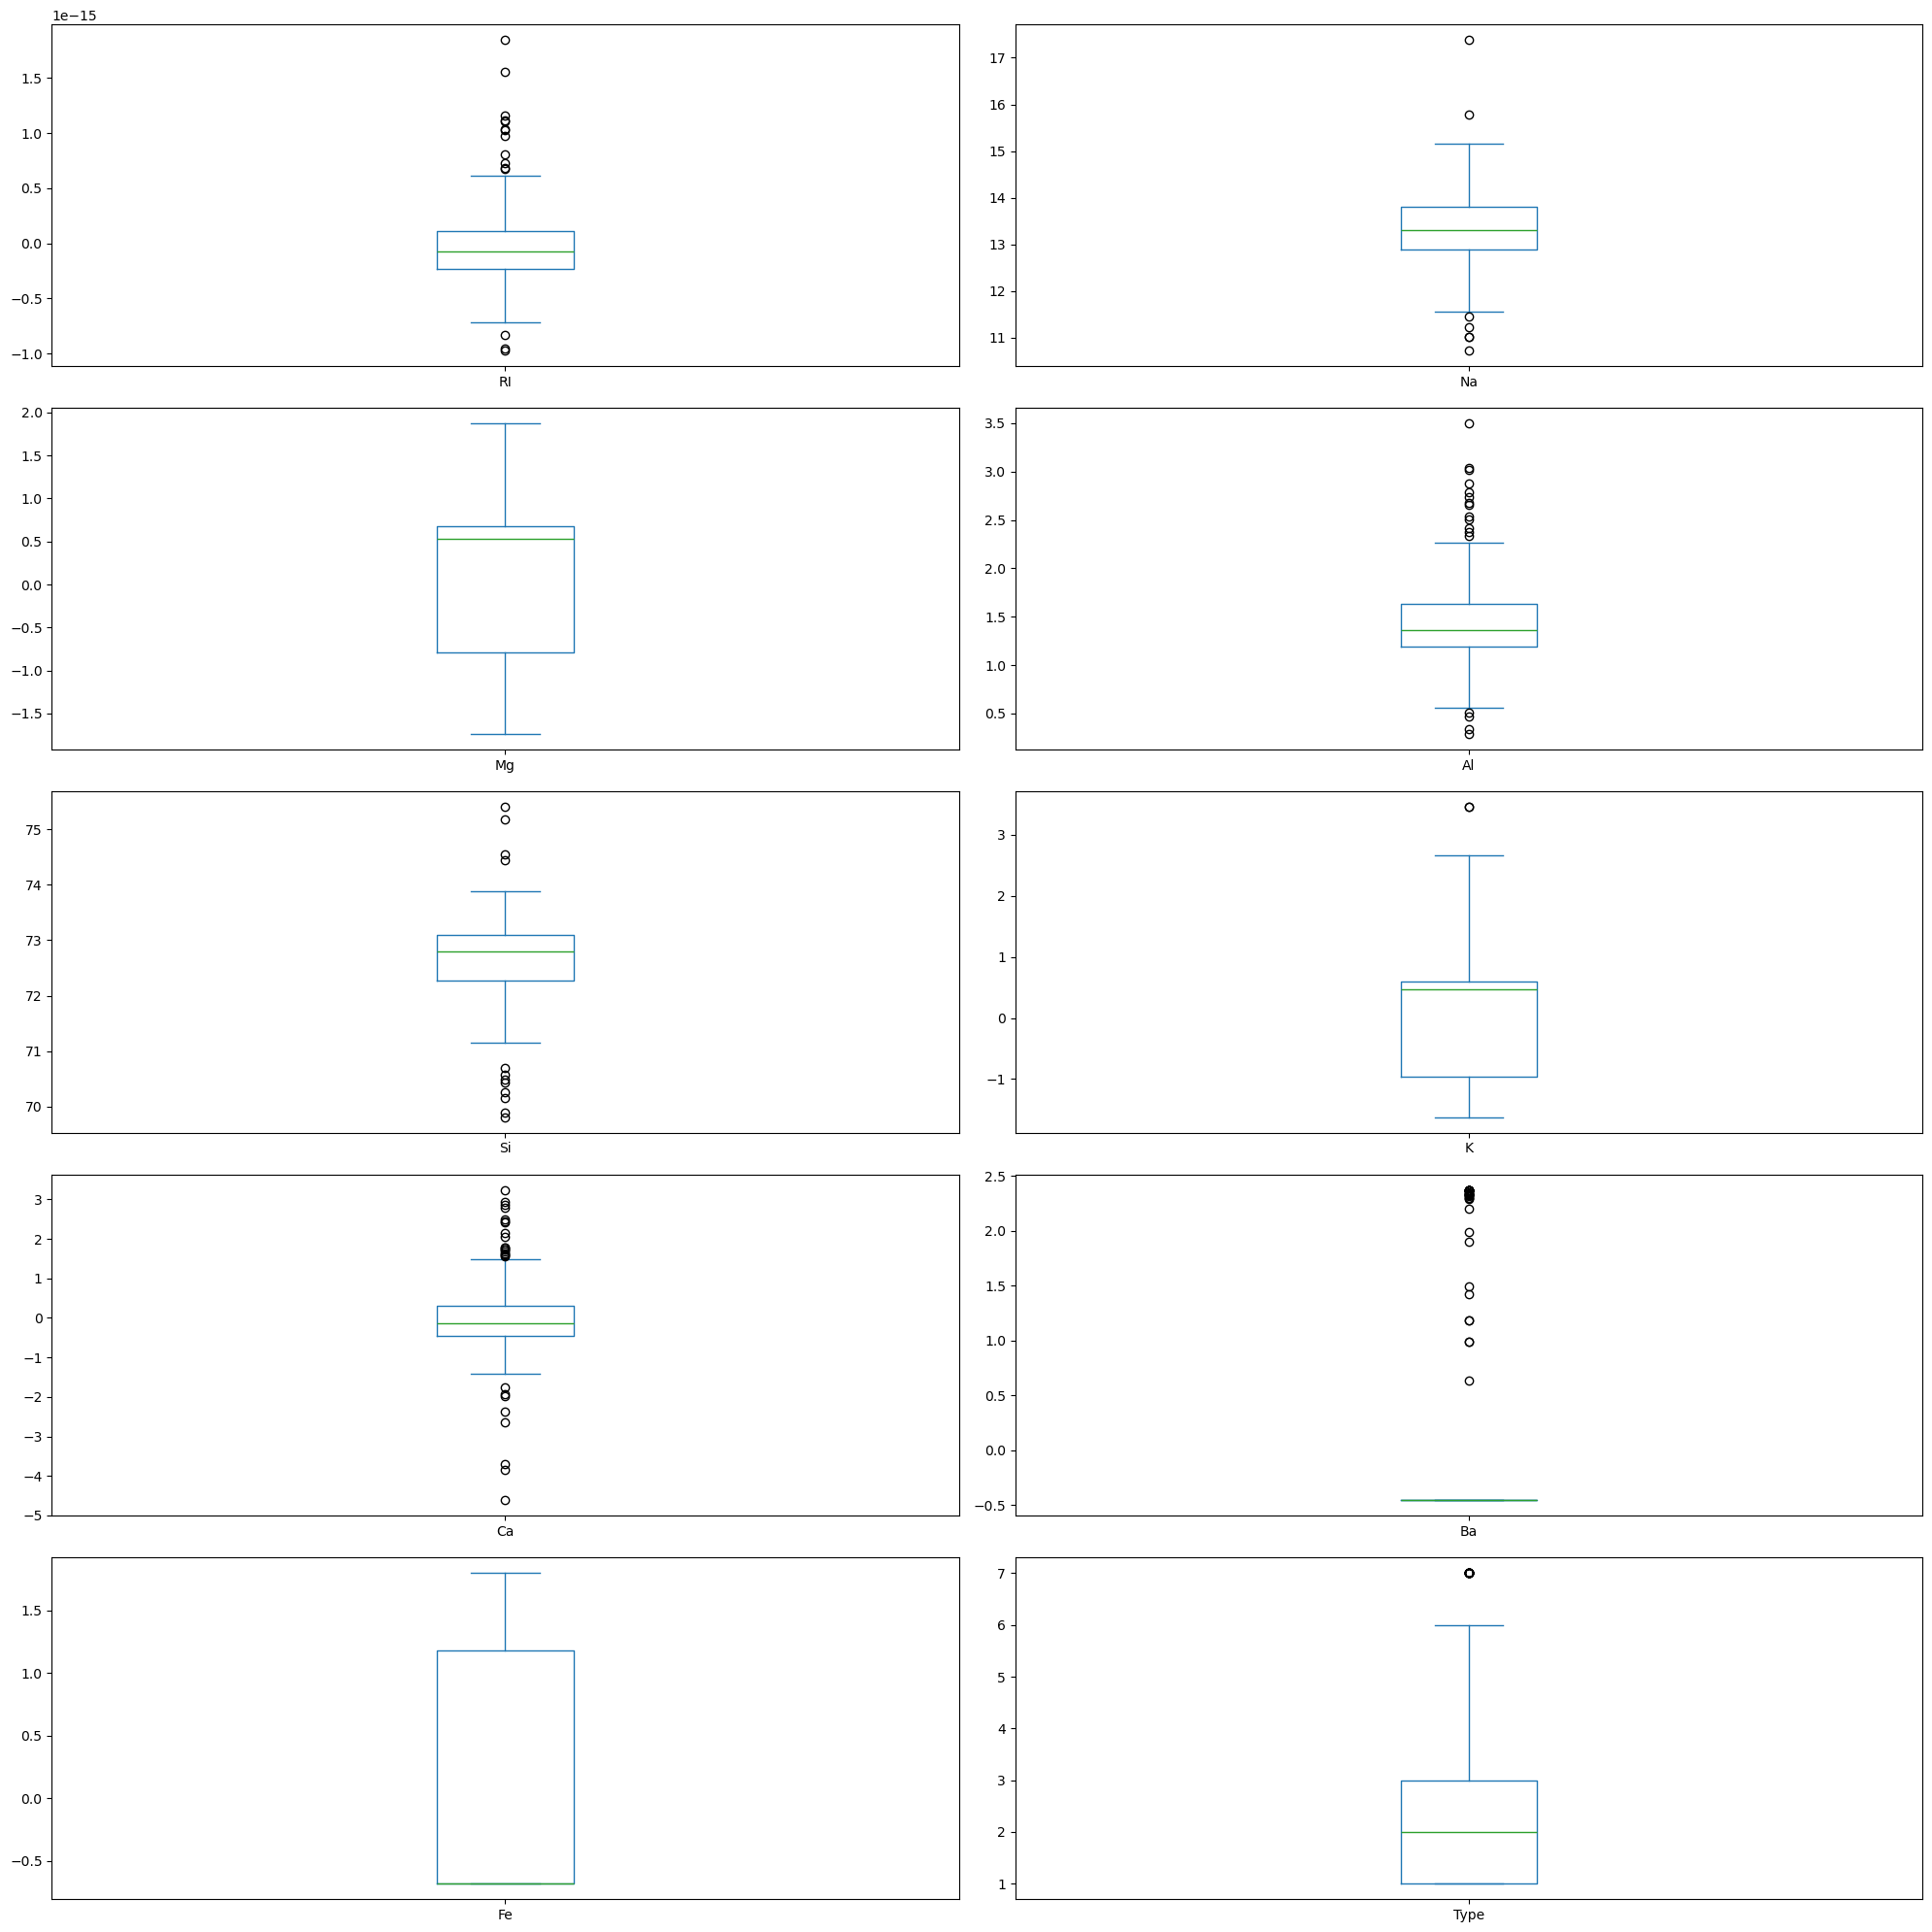

In [16]:
data.plot(kind="box",subplots=True,layout=(5,2),figsize=(20,20))
plt.tight_layout()
plt.show()

# we removed the outliers in the dataset using clip method which is best because we can customizie the qunatile before we did the power transformation by combing both we get better results 

In [17]:
for col in data.drop(["Type","Ba"],axis=1 ) :
    lower=data[col].quantile(0.10)
    upper=data[col].quantile(0.90)
    data[col]=np.clip(data[col],lower,upper)

In [18]:
lower=data["Ba"].quantile(0.25)
upper=data["Ba"].quantile(0.75)
data[col]=np.clip(data["Ba"],lower,upper)

  we didn't remove the type outliers because the type is target column we can't perform anything on it so we keep as it is  but after outliers removing for 75,25 quartile thereare outliers in "Ba" column we keep it as is after clipping because we don't change it disturbution 

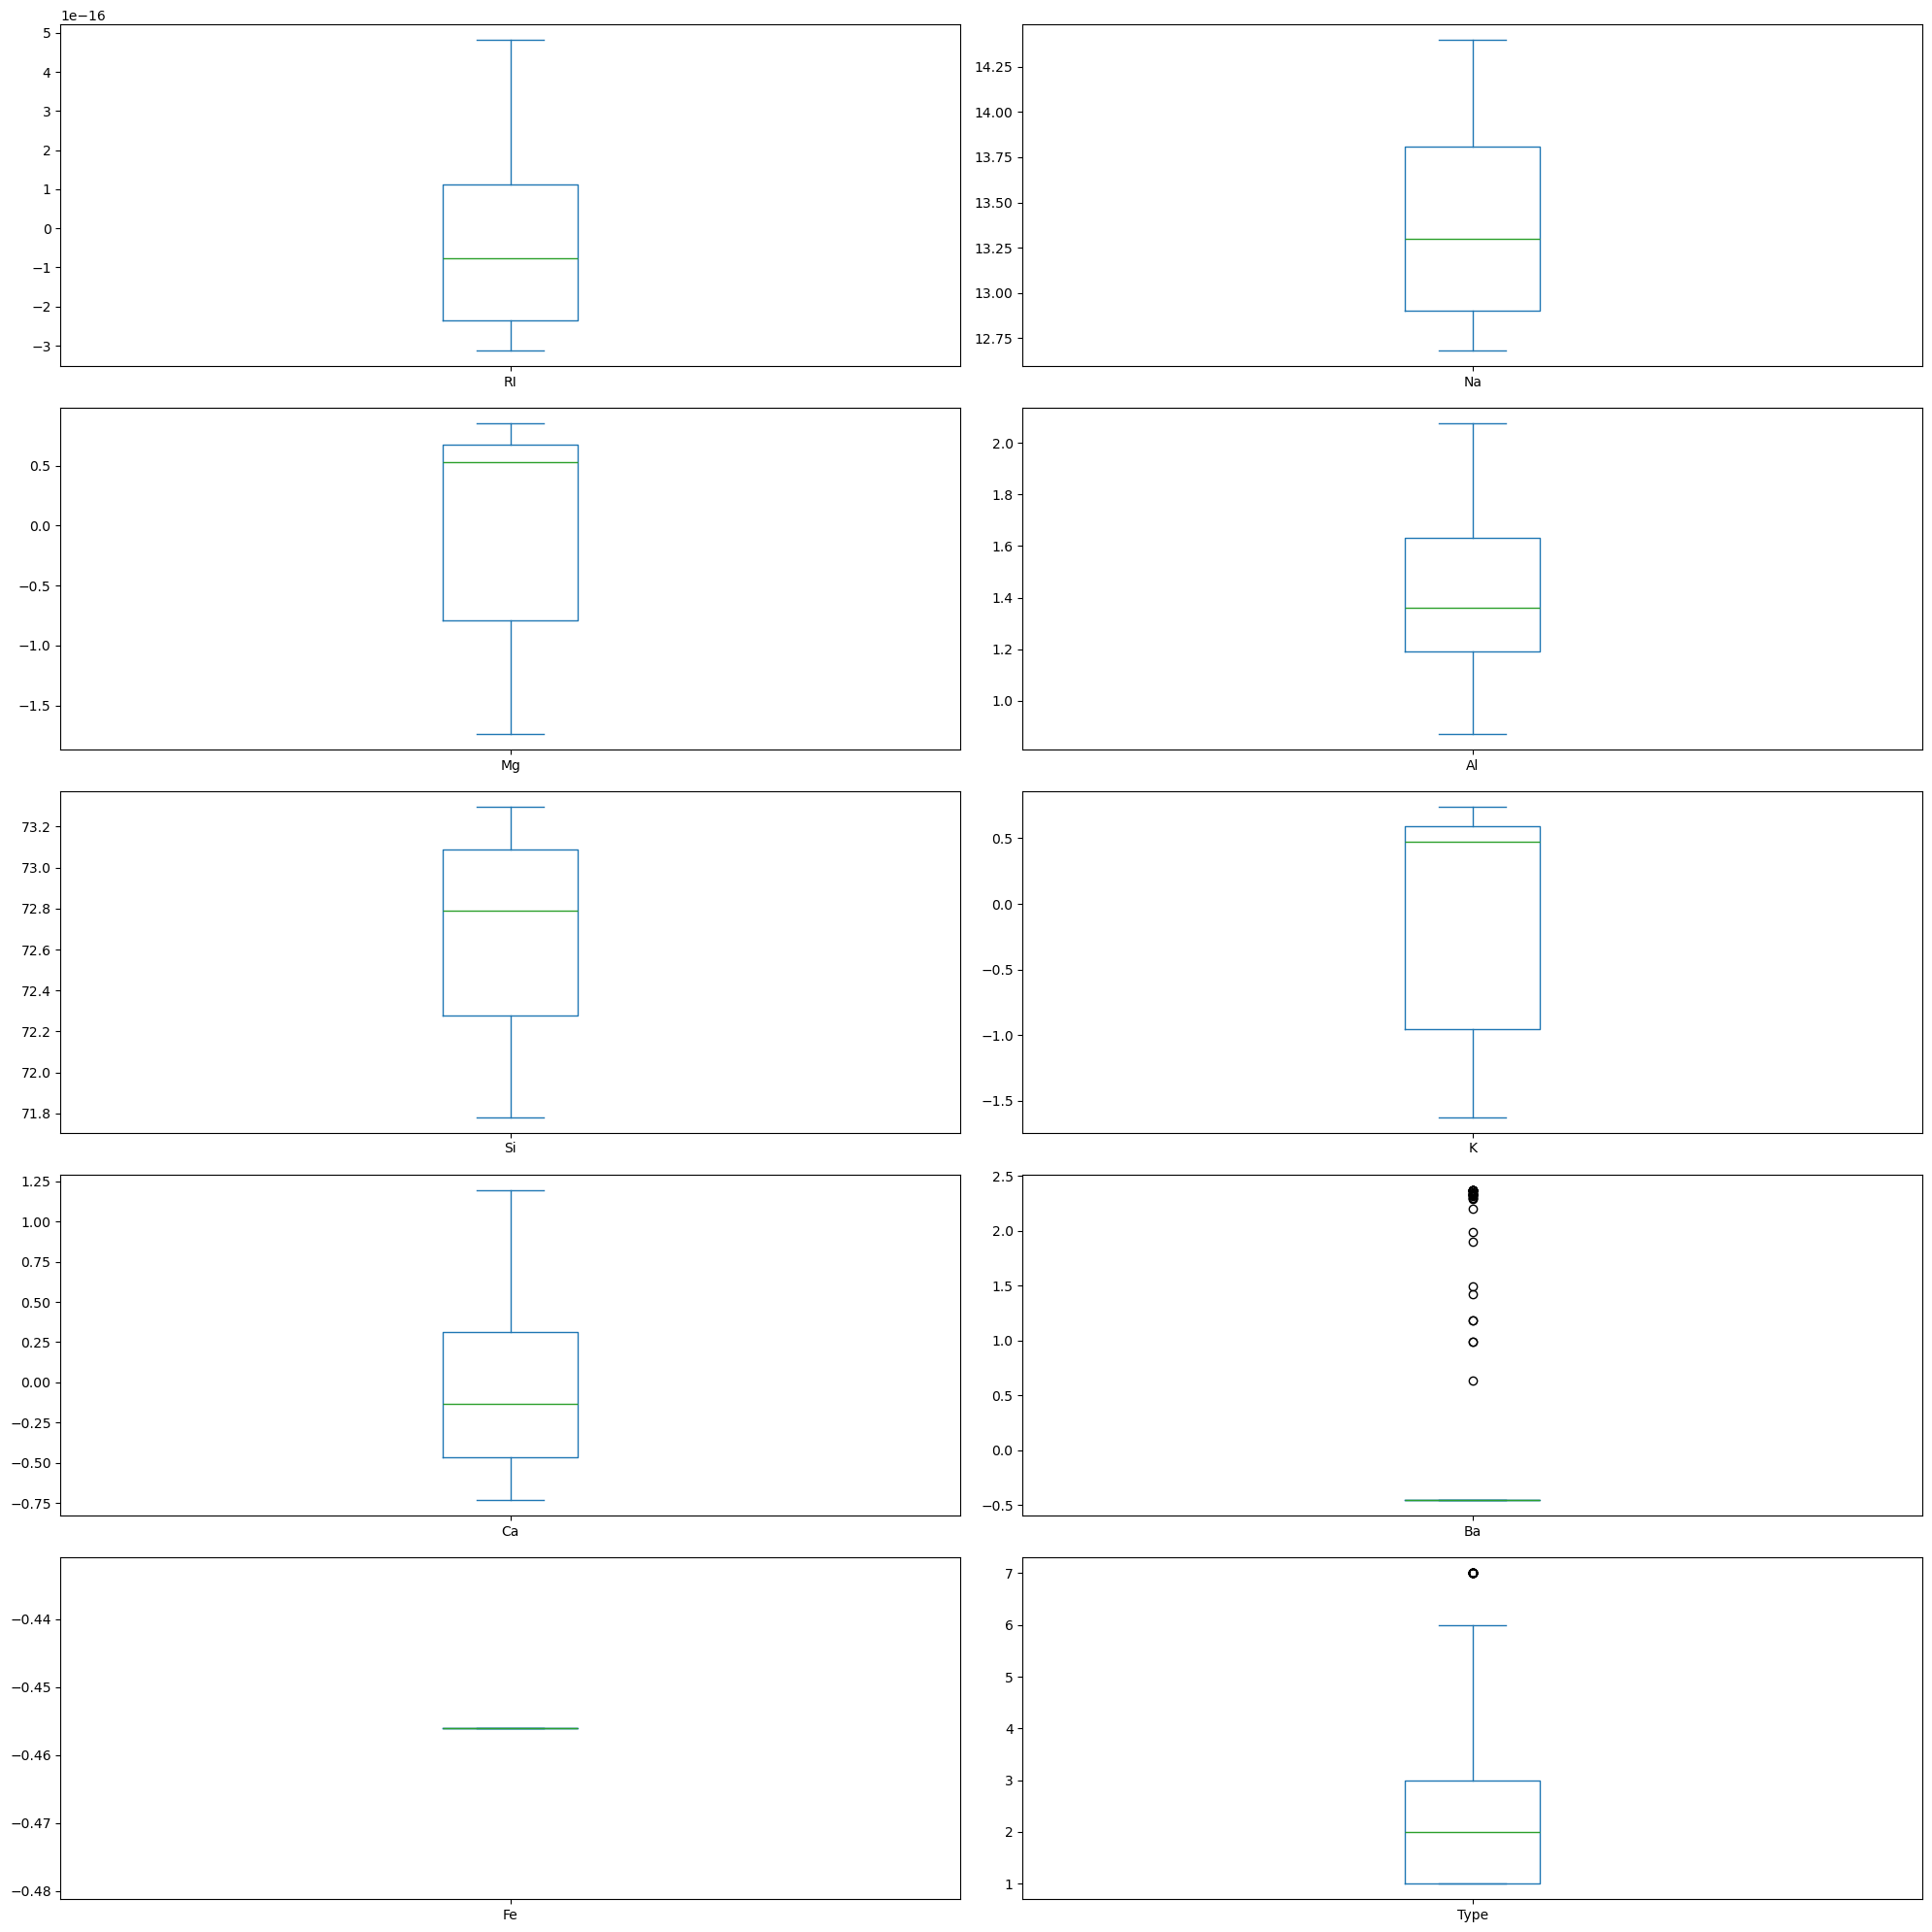

In [19]:
data.plot(kind="box",subplots=True,layout=(5,2),figsize=(20,20))
plt.tight_layout()
plt.show()

In [20]:
data.skew()

RI      0.000000
Na      0.478038
Mg     -0.950540
Al      0.310974
Si     -0.527895
K      -0.813991
Ca      0.689387
Ba      1.817526
Fe      0.000000
Type    1.108861
dtype: float64

In [21]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,0.080953,-0.072795,-0.463248,-0.588827,-0.279497,0.758280,-0.165758,NaN,-0.134206
Na,0.080953,1.000000,-0.371054,0.244462,-0.247500,-0.679298,0.068964,0.510195,NaN,0.569393
Mg,-0.072795,-0.371054,1.000000,-0.509792,-0.202878,0.504272,-0.448906,-0.543153,NaN,-0.757298
Al,-0.463248,0.244462,-0.509792,1.000000,0.215574,0.004392,-0.236762,0.572110,NaN,0.623532
Si,-0.588827,-0.247500,-0.202878,0.215574,1.000000,0.042625,-0.293841,0.151701,NaN,0.190143
K,-0.279497,-0.679298,0.504272,0.004392,0.042625,1.000000,-0.440647,-0.397265,NaN,-0.481133
Ca,0.758280,0.068964,-0.448906,-0.236762,-0.293841,-0.440647,1.000000,-0.040490,NaN,0.122216
Ba,-0.165758,0.510195,-0.543153,0.572110,0.151701,-0.397265,-0.040490,1.000000,NaN,0.668383
Fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,-0.134206,0.569393,-0.757298,0.623532,0.190143,-0.481133,0.122216,0.668383,NaN,1.000000


# we  used correlation matrix to plot visulaize using the heatmap with annot and cmap  it shows if one column increase the other increase or not and it shows if one column decrease the other decrease or not  

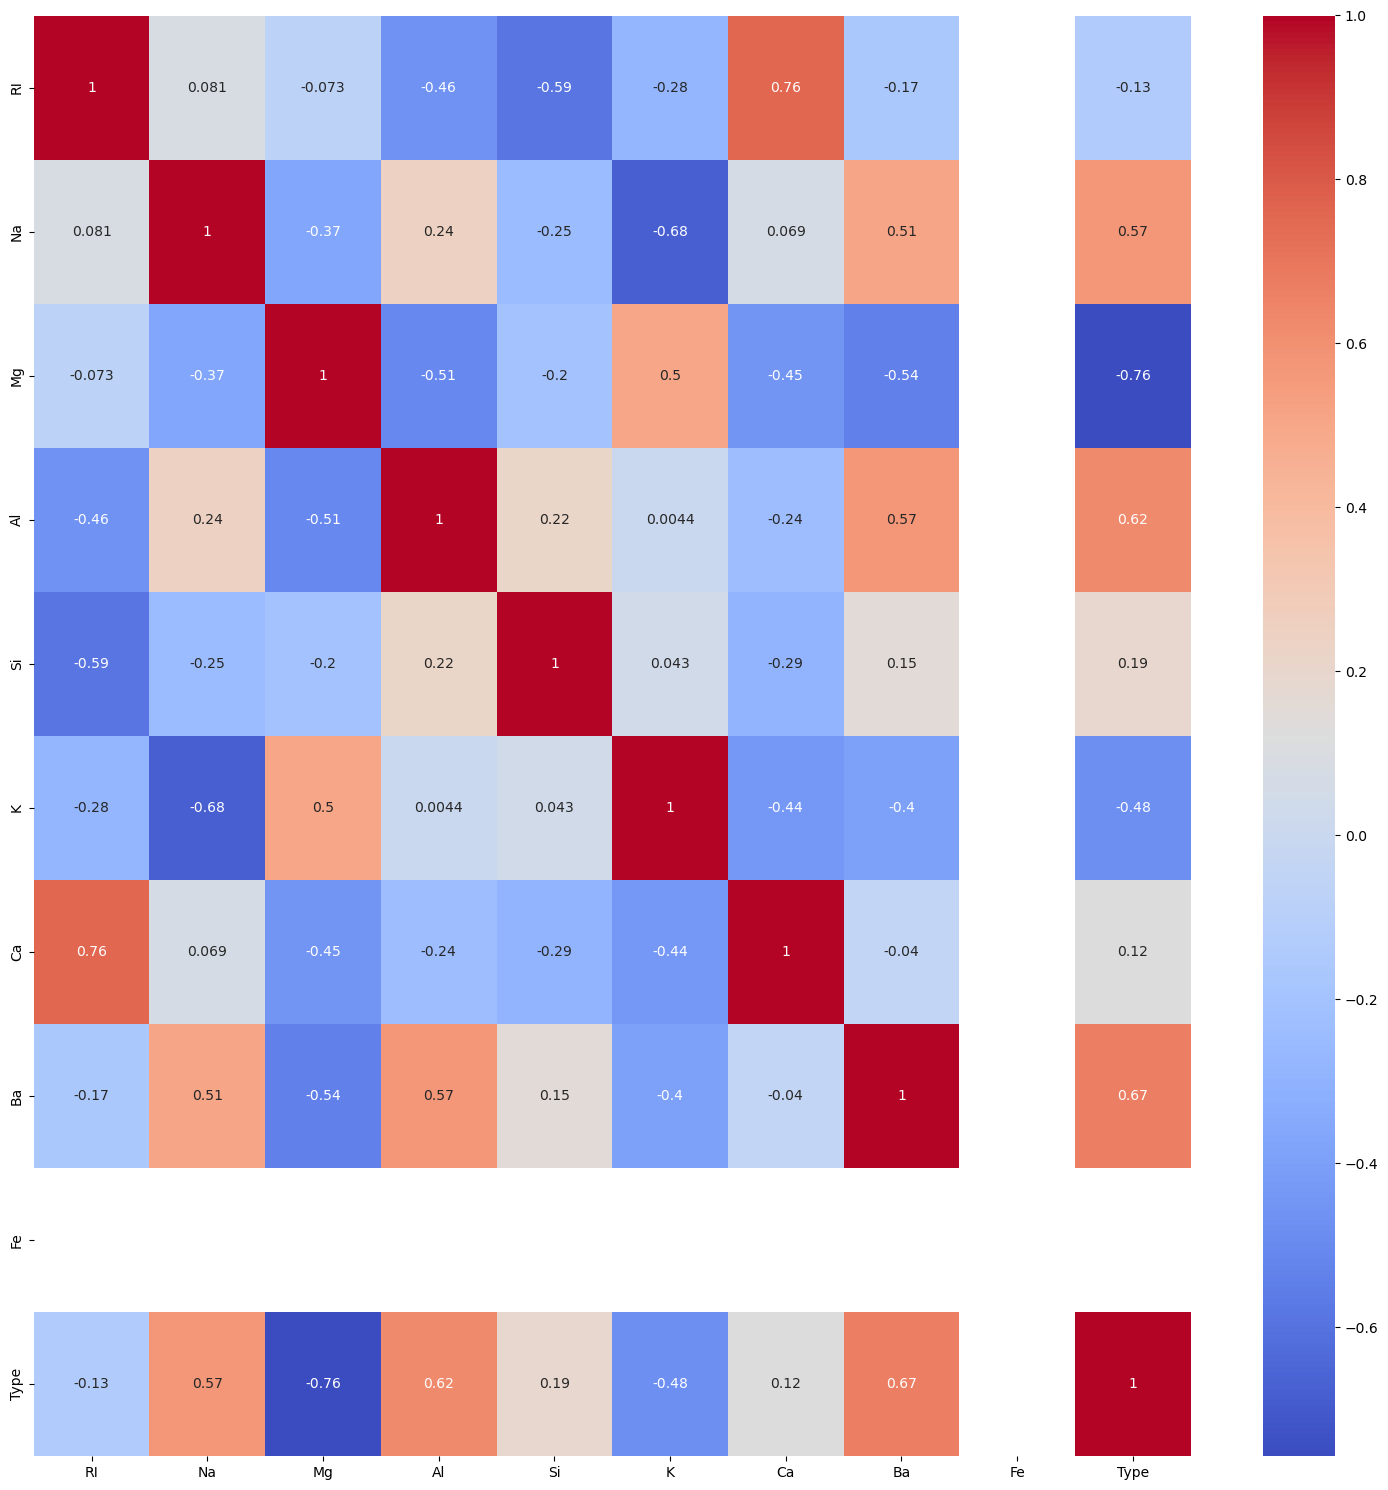

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.tight_layout()
plt.show()

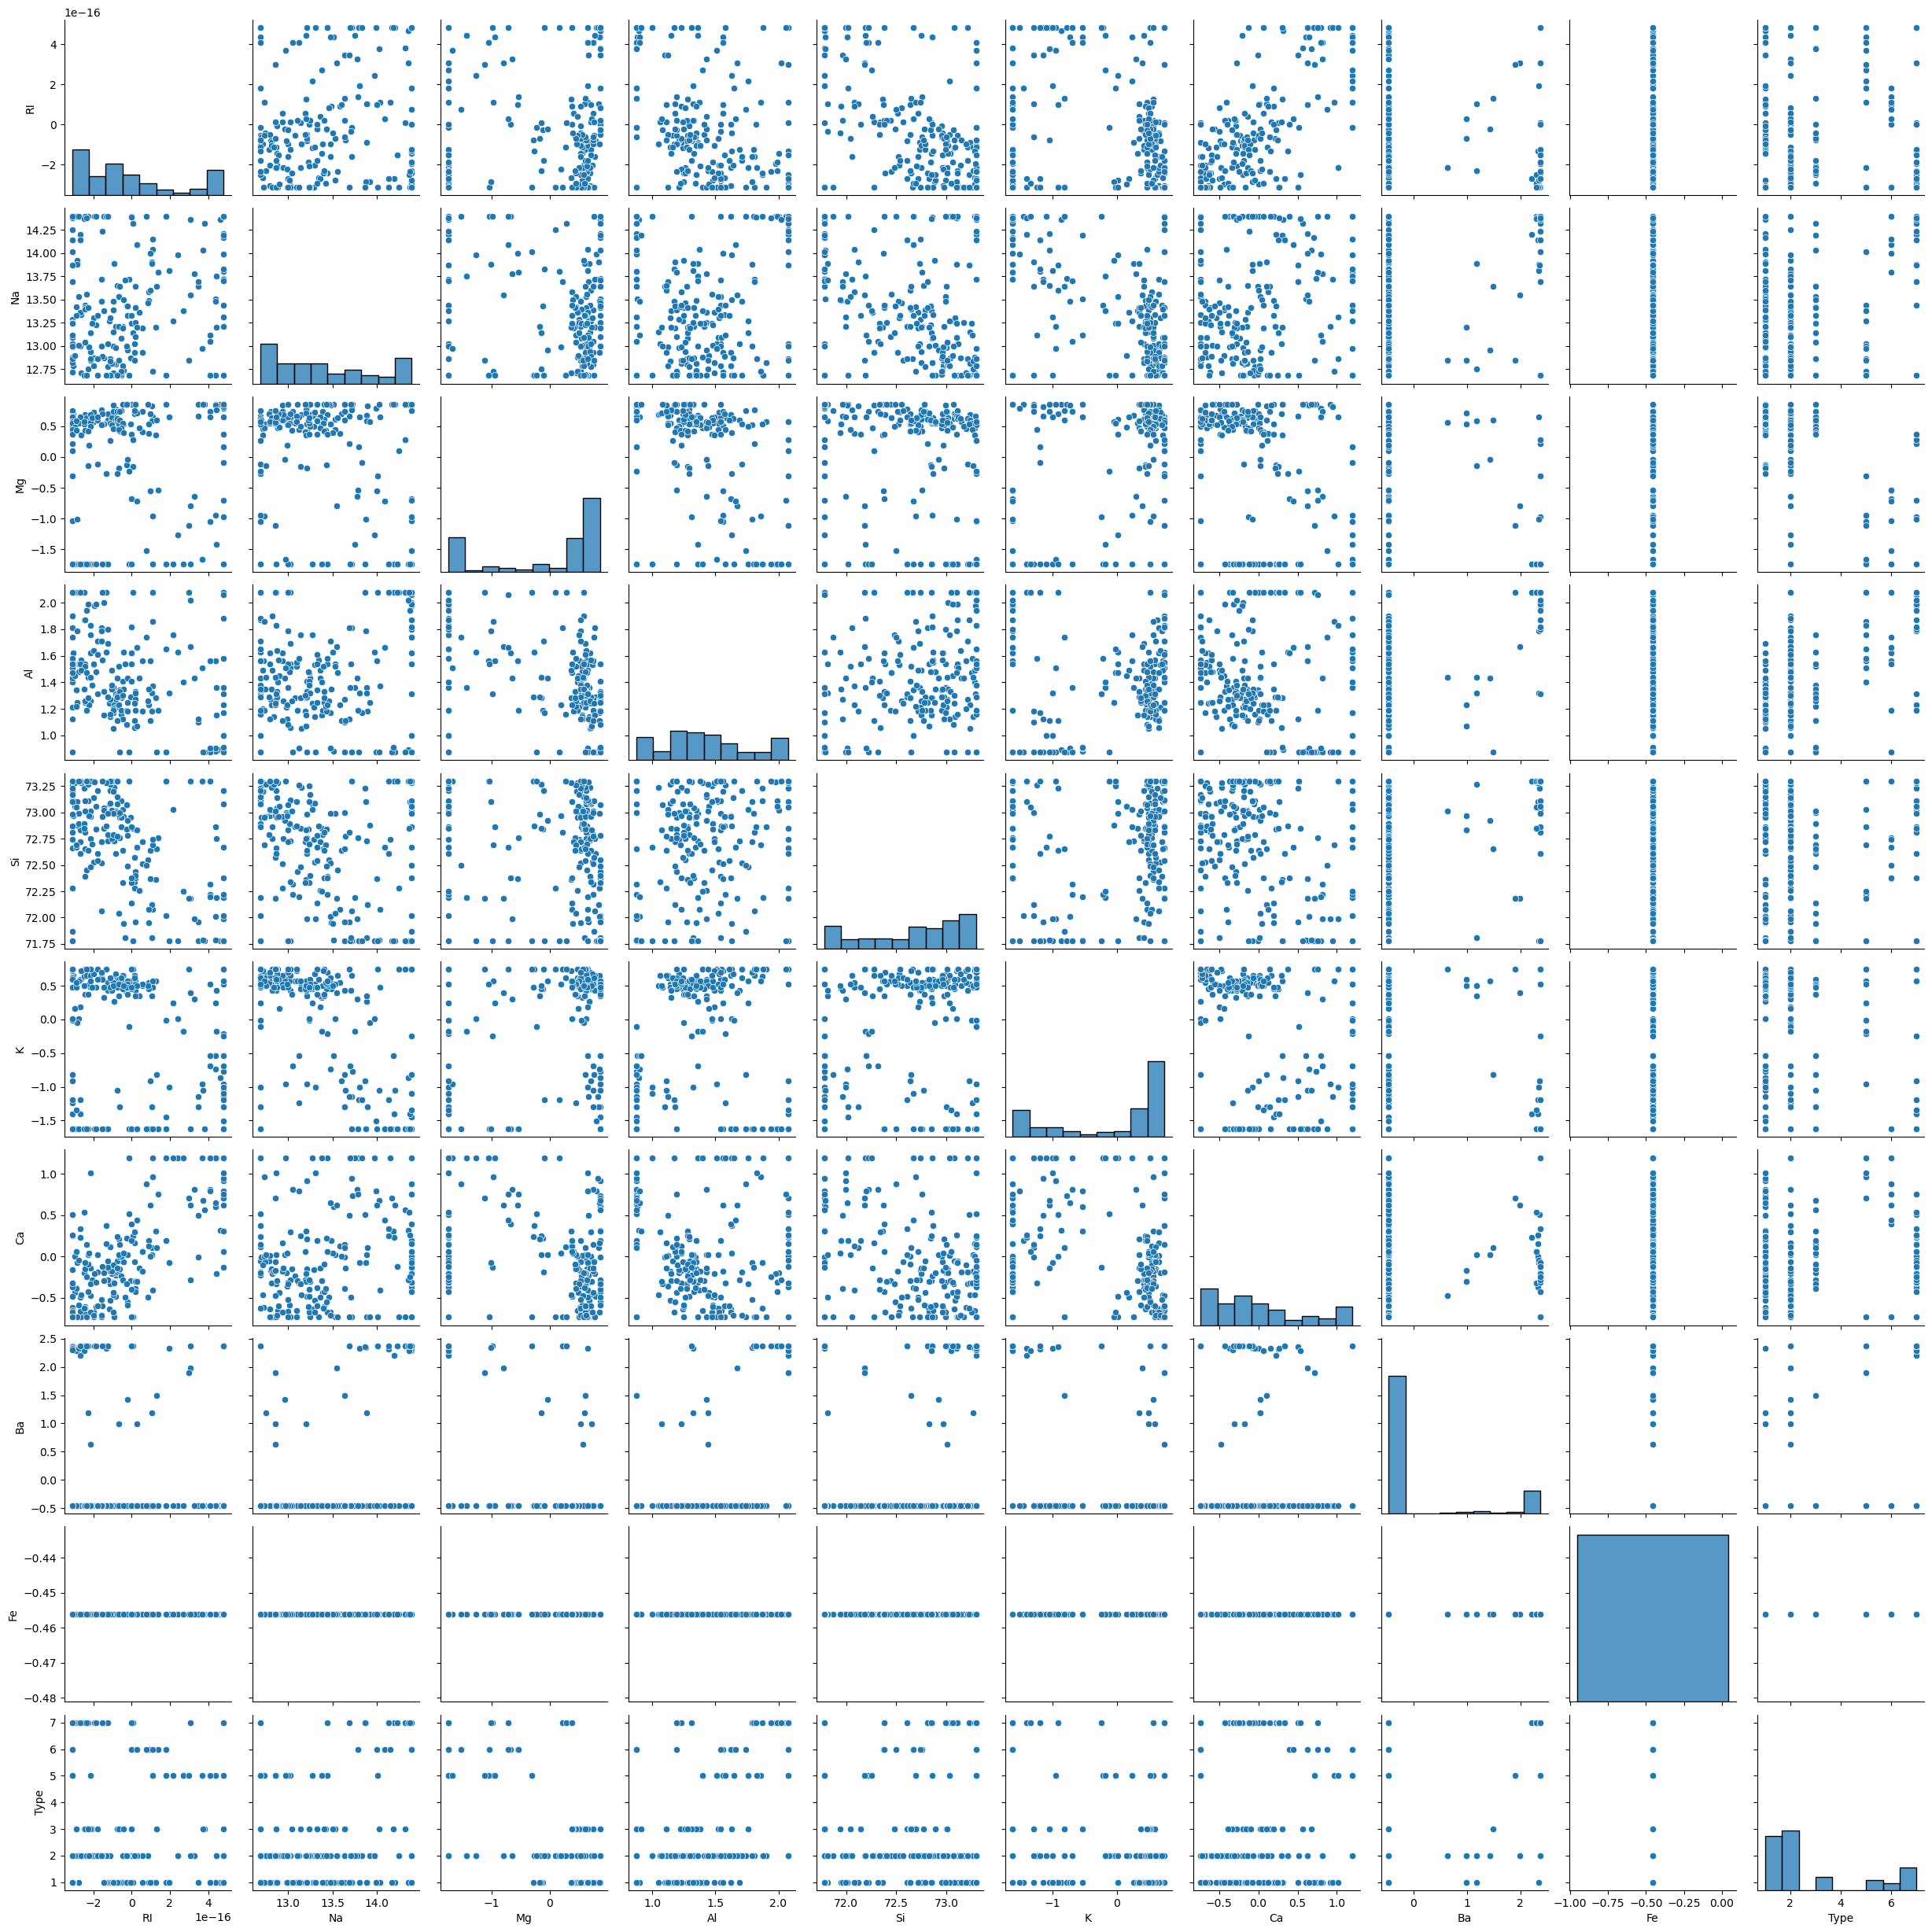

In [23]:
sns.pairplot(data)
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss=StandardScaler()
ssdata=ss.fit_transform(data.drop("Type",axis=1))
ssdf=pd.DataFrame(ssdata,columns=ss.get_feature_names_out())
ssdf["Type"]=data["Type"]
ssdf

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.399380,0.412747,0.888354,-0.917725,-1.789016,-1.392430,-0.022701,-0.456097,-1.110223e-16,1
1,-0.282478,0.851971,0.702926,-0.187878,0.102281,0.381809,-1.234707,-0.456097,-1.110223e-16,1
2,-1.003274,0.219488,0.641906,0.317400,0.620991,0.090914,-1.234707,-0.456097,-1.110223e-16,1
3,-0.255782,-0.342718,0.814827,-0.384375,-0.137124,0.639714,-0.819790,-0.456097,-1.110223e-16,1
4,-0.389263,-0.237305,0.727564,-0.524731,0.800544,0.584961,-1.065493,-0.456097,-1.110223e-16,1
...,...,...,...,...,...,...,...,...,...,...
208,-0.976578,1.291194,-1.751105,1.822007,-0.137124,-1.277045,0.552478,2.365582,-1.110223e-16,7
209,-0.656224,1.744474,-1.751105,1.580597,0.760644,-1.765946,-0.537147,2.371415,-1.110223e-16,7
210,1.239203,1.677711,-1.751105,1.664810,1.235463,-1.765946,-0.476066,2.371564,-1.110223e-16,7
211,-0.843097,1.712849,-1.751105,1.440241,1.235463,-1.765946,-0.415594,2.371347,-1.110223e-16,7


In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score  

In [27]:
x=ssdf.drop("Type",axis=1)
y=ssdf.Type

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [64]:

model3=RandomForestClassifier(n_estimators=100,class_weight="balanced",min_samples_split=2,min_samples_leaf=1,max_features="sqrt",criterion="gini",random_state=42)
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.9090909090909091

In [61]:
y_pred=model3.predict(x_test)

In [59]:
confusion_matrix(y_test,y_pred)

array([[5, 0, 0, 0, 0],
       [1, 7, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 0, 4]], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.80      1.00      0.89         8
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       1.00      0.80      0.89         5

    accuracy                           0.91        22
   macro avg       0.96      0.86      0.89        22
weighted avg       0.93      0.91      0.90        22



In [69]:
kfold=KFold(n_splits=10,shuffle=True,random_state=42)
model=RandomForestClassifier(n_estimators=200,class_weight="balanced",min_samples_split=2,min_samples_leaf=1,max_features="sqrt",criterion="gini",random_state=42)
crossvalscore=cross_val_score(model,x,y,cv=kfold)
print(crossvalscore.mean()*100)
model.fit(x,y)

79.32900432900432


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

 # Bagging method 

# Baggingclassifier we used the decison tree the difference between the random forest and this model in the random forest we use subset of feature but here we use all the features for the spliting 

In [34]:
kfold=KFold(n_splits=10)
model1=DecisionTreeClassifier()
bagg=BaggingClassifier(model1,n_estimators=200,random_state=42)
cross=cross_val_score(bagg,x,y,cv=kfold)
print(cross.mean()*100)
bagg.fit(x,y)

47.35930735930736


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=200,
                  random_state=42)

In [71]:
from sklearn.linear_model import LogisticRegression

In [74]:
kfold=KFold(n_splits=10)
model1=LogisticRegression(max_iter=1000)
bagg=BaggingClassifier(model1,n_estimators=200,random_state=42)
cross=cross_val_score(bagg,x,y,cv=kfold)
print(cross.mean()*100)
bagg.fit(x,y)

41.34199134199134


BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=200,
                  random_state=42)

# Boosting method  we used ADABOOST

In [87]:
kfold=KFold(n_splits=10,shuffle=True,random_state=42)
model5=DecisionTreeClassifier()
ada=AdaBoostClassifier(model5,n_estimators=200,random_state=42,learning_rate=0.1,algorithm="SAMME")
crpss=cross_val_score(ada,x,y,cv=kfold)
print(crpss.mean()*100)
ada.fit(x,y)


66.27705627705627


AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier(),
                   learning_rate=0.1, n_estimators=200, random_state=42)

In [94]:
kfold=KFold(n_splits=10,shuffle=True,random_state=42)
model5=DecisionTreeClassifier()
ada=AdaBoostClassifier(model5,n_estimators=300,random_state=42,learning_rate=0.09,algorithm="SAMME")
crpss=cross_val_score(ada,x,y,cv=kfold)
print(crpss.mean()*100)
ada.fit(x,y)


66.27705627705627


AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier(),
                   learning_rate=0.09, n_estimators=300, random_state=42)

# Both Bagging and Boosting are ensemble learning techniques that combine multiple weak learners to improve model performance.
Bagging builds independent models on random subsets of data to reduce variance.
Boosting builds models sequentially, where each new learner corrects previous errors to reduce bias.
Random Forest, which is based on Bagging, further improves performance by adding random feature selection, making it more robust and stable.
On the given glass dataset:
# Bagging achieved an accuracy of 47%,AdaBoost achieved 66%, andRandom Forest performed best with 90%, demonstrating the effectiveness of feature randomness and class balancing.

2.Explain how to handle imbalance in the data.